# __Reference envelop plots__

*Authors*: Andrea Garcia Juan (andrea.garcia.juan@ifremer.fr), Kevin Balem (kevin.balem@ifremer.fr), Cécile Cabanes (cecile.cabanes@ifremer.fr) and Guillaume Maze (gmaze@ifremer.fr)
***

## Description

This notebook allows to plot the reference profiles envelops for comparing OWC distance-based profile selection and PCM profile selection. Three exemples are provided: float 4900136 crossing the Gulf Stream, float 3901928 in the Southern Ocean and float 3901915 in the Agulhas Current. 

***
This notebook has been developed at the Laboratory for Ocean Physics and Satellite remote sensing, IFREMER, within the framework of the Euro-ArgoRISE project. This project has received funding from the European Union’s Horizon 2020 research and innovation programme under grant agreement no 824131. Call INFRADEV-03-2018-2019: Individual support to ESFRI and other world-class research infrastructures.

<div>
<center>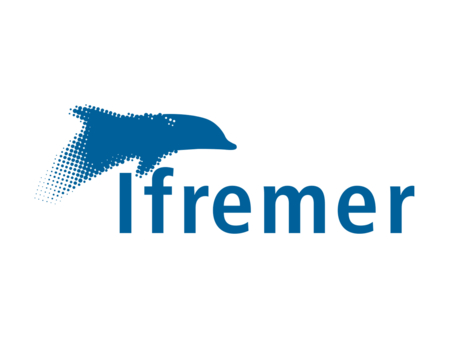 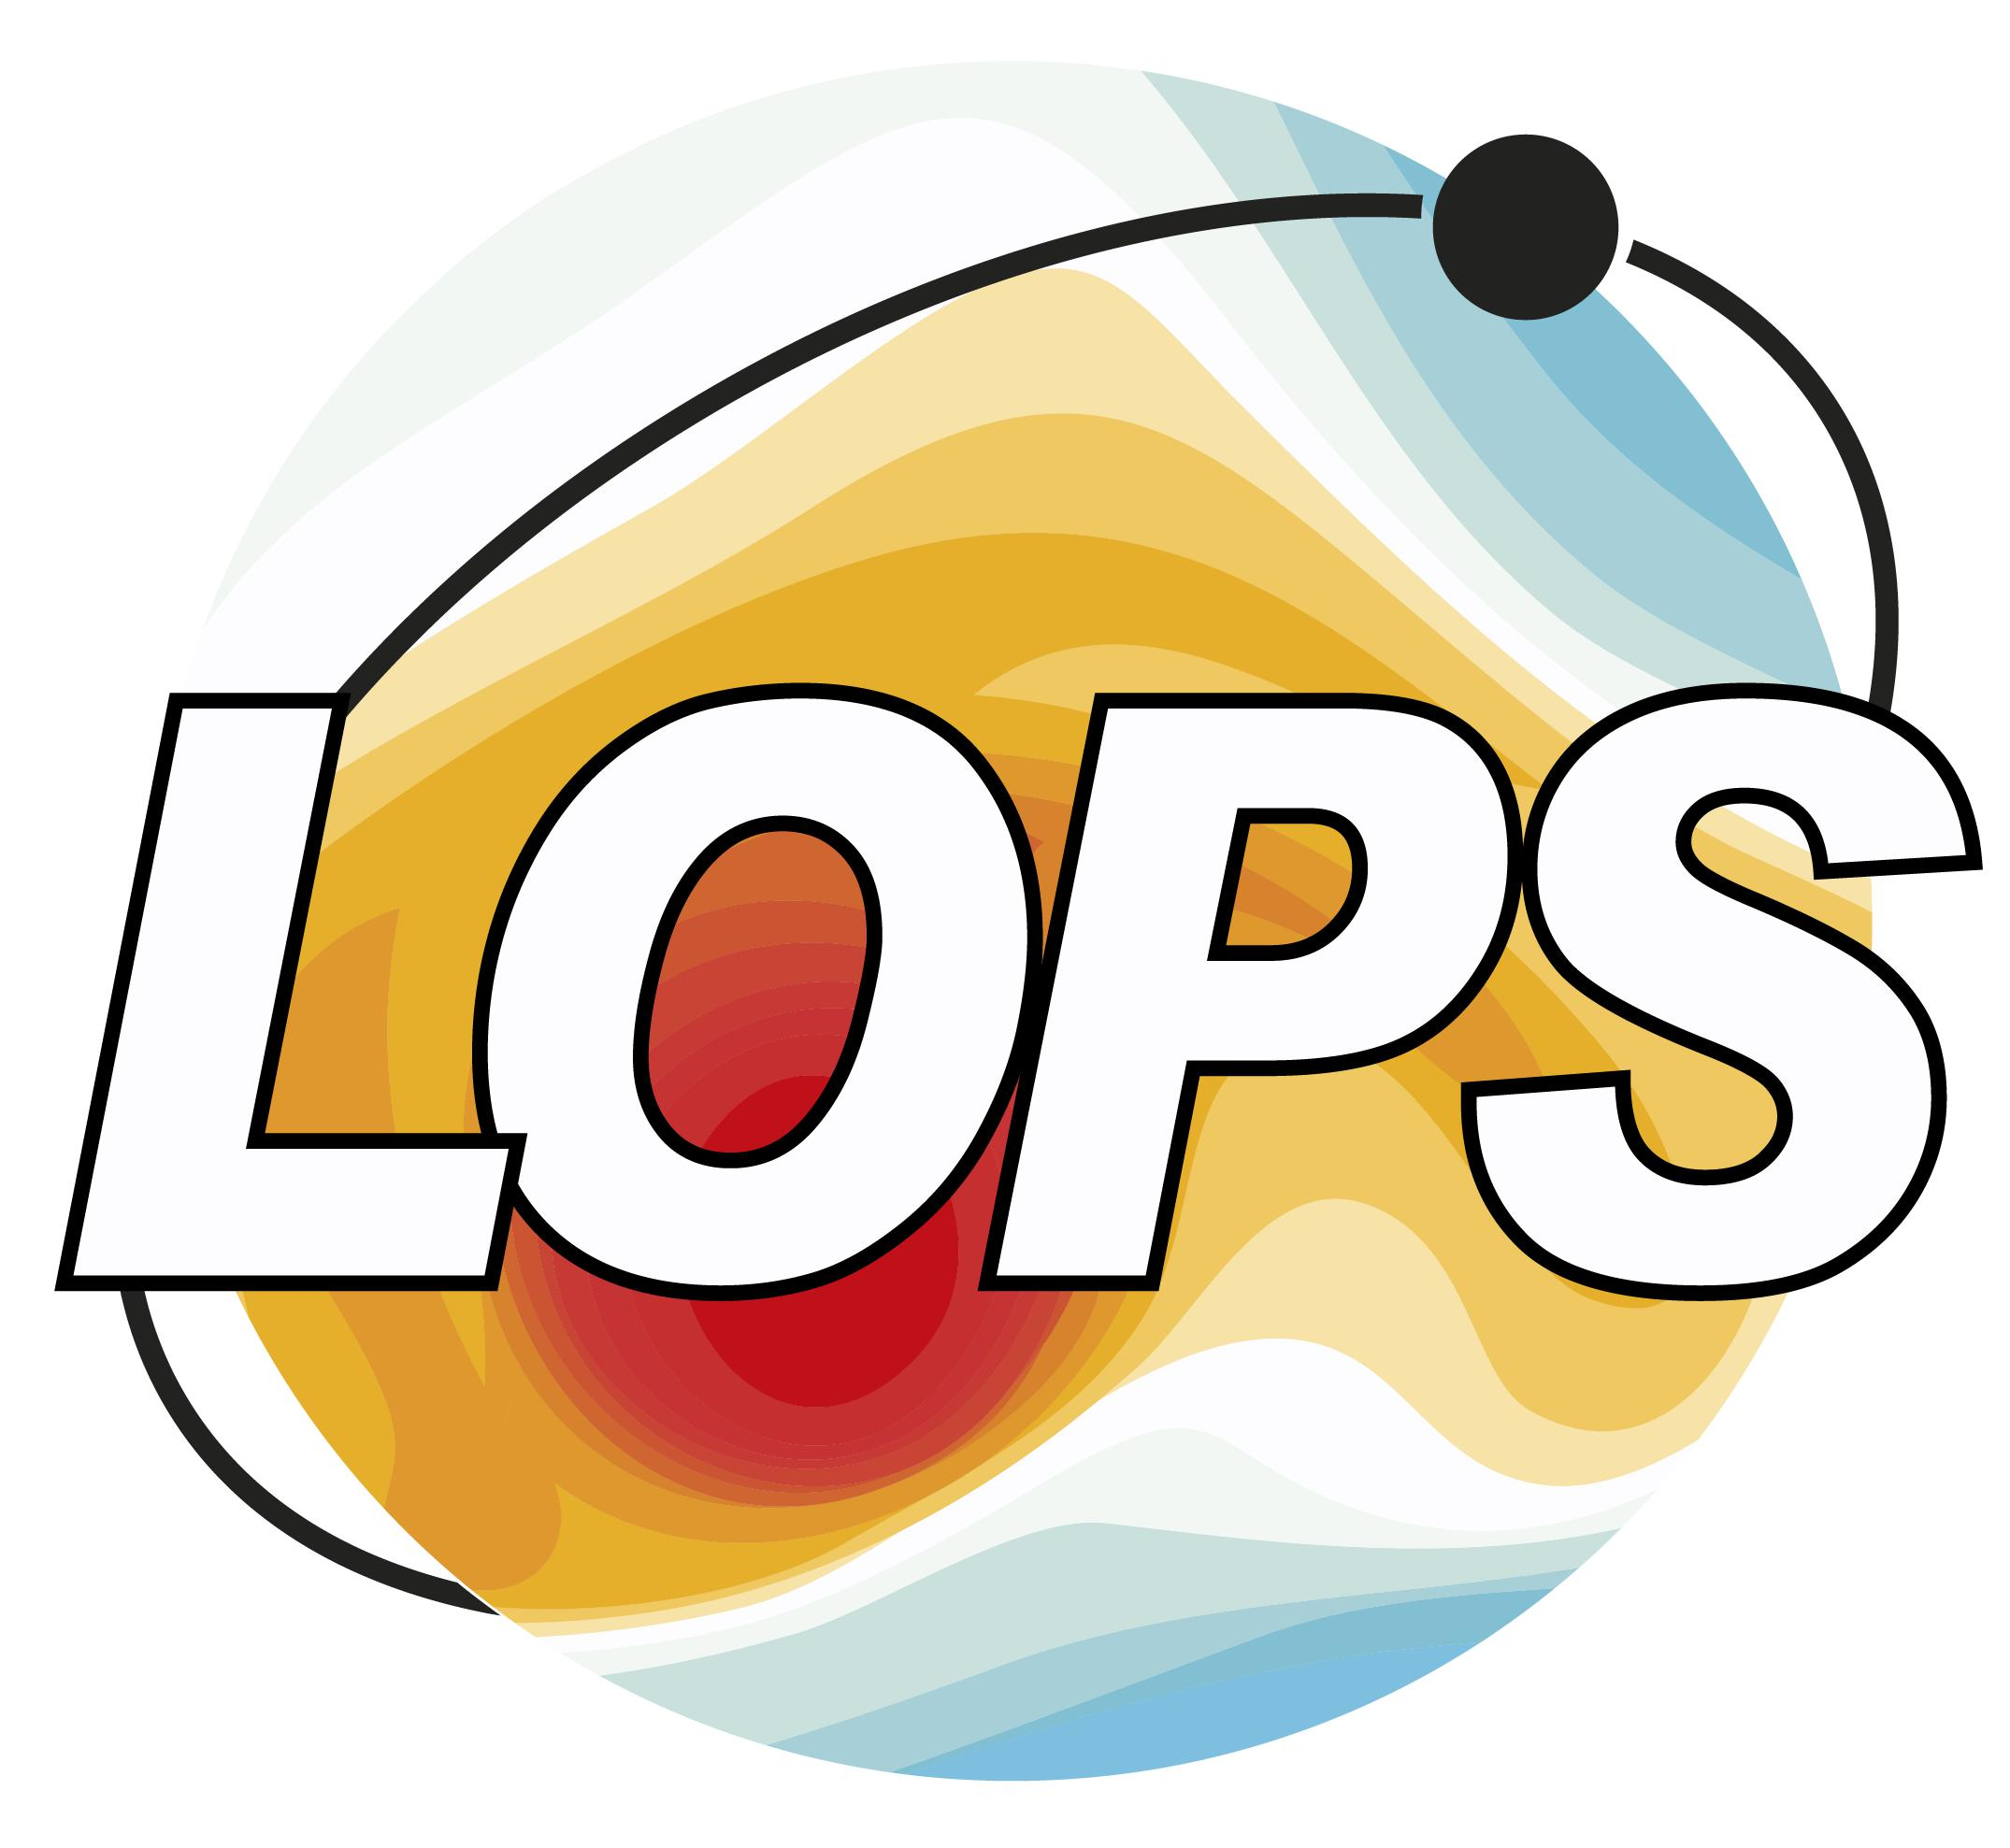 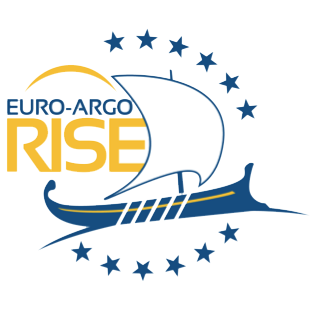</center>
</div>

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import argopy
argopy.set_options(src='localftp', local_ftp='/home/coriolis_exp/spool/co05/co0508/')
argopy.set_options(mode='expert')
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

import scipy as sp
from scipy.io import loadmat

import seawater as sw

In [2]:
def get_dataow(file_path):
    
    # load from .met file
    mat_dict_load = sp.io.loadmat(file_path)
    
    #create a xarray dataset
    ds_ref = xr.Dataset(
         data_vars=dict(
             pres=(["n_pres", "n_profiles"], mat_dict_load['la_bhist_pres']),
             ptmp=(["n_pres", "n_profiles"], mat_dict_load['la_bhist_ptmp']),
             sal=(["n_pres", "n_profiles"], mat_dict_load['la_bhist_sal']),
         ),
         coords=dict(
             long=(["n_profiles"], np.squeeze(mat_dict_load['la_bhist_long'])),
             lat=(["n_profiles"], np.squeeze(mat_dict_load['la_bhist_lat'])),
             dates=(["n_profiles"], pd.to_datetime(list(map(str, map(int, np.squeeze(mat_dict_load['la_bhist_dates'])))))),
         ),
     )

    return ds_ref

### __User inputs__

Available examples:
- Float __4900136__: profiles 54, 77, 78, 79, 80, 116, 119 (comparing with classification using k=4)
- Float __3901928__: profiles 30, 55, 56, 120, 161, 162, 163 (comparing with classification using k=4)
- Float __3901915__: profiles 60, 61, 69, 72, 80, 91, 165, 191 (comparing with classification using k=6)

In [3]:
float_WMO = 4900136
prof_num = 77
ref_type = 'argo' # or 'CTD'

## __1. Load float profile__

Using argopy. If it is not working, downgrade your xarray version to 0.16.1 (`pip intall xarray==0.16.1`)

In [4]:
argo_loader = ArgoDataFetcher()
    
ds_f = argo_loader.profile(float_WMO, prof_num).to_xarray()
ds_f = ds_f.argo.point2profile()

# calculate potential temperature
pr = 0 # reference pressure in dbar
ds_f = ds_f.assign(ptmp=(["N_PROF", "N_LEVELS"], sw.ptmp(ds_f['PSAL'].values,ds_f['TEMP'].values,ds_f['PRES'].values,pr)))

In [5]:
print(ds_f)

<xarray.Dataset>
Dimensions:                   (N_LEVELS: 71, N_PROF: 1)
Coordinates:
  * N_PROF                    (N_PROF) int64 0
  * N_LEVELS                  (N_LEVELS) int64 0 1 2 3 4 5 ... 65 66 67 68 69 70
    TIME                      (N_PROF) datetime64[ns] 2004-08-04T07:52:00
    LATITUDE                  (N_PROF) float64 40.87
    LONGITUDE                 (N_PROF) float64 -61.1
Data variables:
    CONFIG_MISSION_NUMBER     (N_PROF) int64 0
    CYCLE_NUMBER              (N_PROF) int64 77
    DATA_CENTRE               (N_PROF) <U2 'ME'
    DATA_MODE                 (N_PROF) <U1 'D'
    DATA_STATE_INDICATOR      (N_PROF) <U4 '2C+ '
    DC_REFERENCE              (N_PROF) <U32 '49001369978PF                   '
    DIRECTION                 (N_PROF) <U1 'A'
    FIRMWARE_VERSION          (N_PROF) <U32 'n/a                             '
    FLOAT_SERIAL_NO           (N_PROF) <U32 '366                             '
    PI_NAME                   (N_PROF) <U64 'Blair Greenan        

## __2. Load reference data__

__Data without class selection__

In [6]:
file_path = 'mat_files/' + str(float_WMO) + '/ex_profiles/' + str(float_WMO) + '_prof' + str(prof_num) + '_refdata_' + ref_type + '_noclass.mat'
ds_ref = get_dataow(file_path)
print(ds_ref)

<xarray.Dataset>
Dimensions:  (n_pres: 1029, n_profiles: 250)
Coordinates:
    long     (n_profiles) float64 298.8 298.6 299.6 298.9 ... 301.4 302.7 303.3
    lat      (n_profiles) float64 40.08 40.92 40.67 40.65 ... 37.04 39.98 39.79
    dates    (n_profiles) datetime64[ns] 2007-01-01 2007-01-01 ... 2008-01-01
Dimensions without coordinates: n_pres, n_profiles
Data variables:
    pres     (n_pres, n_profiles) float64 4.5 4.9 4.7 3.1 ... nan nan nan nan
    ptmp     (n_pres, n_profiles) float64 18.62 17.23 21.03 ... nan nan nan
    sal      (n_pres, n_profiles) float64 35.72 35.54 36.48 ... nan nan nan


__Data with class selection__

In [7]:
file_path = 'mat_files/' + str(float_WMO) + '/ex_profiles/' + str(float_WMO) + '_prof' + str(prof_num) + '_refdata_' + ref_type + '_class.mat'
ds_ref_class = get_dataow(file_path)
print(ds_ref_class)

<xarray.Dataset>
Dimensions:  (n_pres: 1029, n_profiles: 161)
Coordinates:
    long     (n_profiles) float64 298.8 298.6 299.6 298.9 ... 300.3 300.3 300.6
    lat      (n_profiles) float64 40.08 40.92 40.67 40.65 ... 39.93 39.43 39.83
    dates    (n_profiles) datetime64[ns] 2007-01-01 2007-01-01 ... 2007-01-01
Dimensions without coordinates: n_pres, n_profiles
Data variables:
    pres     (n_pres, n_profiles) float64 4.5 4.9 4.7 3.1 ... nan nan nan nan
    ptmp     (n_pres, n_profiles) float64 18.62 17.23 21.03 ... nan nan nan
    sal      (n_pres, n_profiles) float64 35.72 35.54 36.48 ... nan nan nan


## __3. Plots__

__Potential temperature__

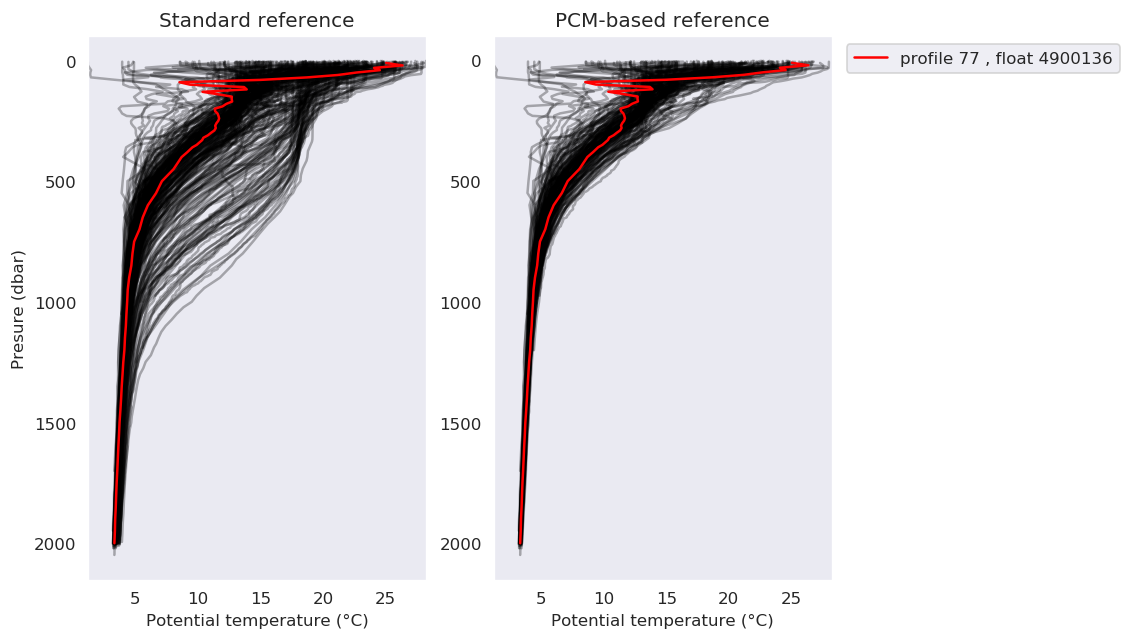

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(
            8, 6), dpi=120, facecolor='w', edgecolor='k')

for i in range(len(ds_ref['n_profiles'])):
    ax[0].plot(ds_ref['ptmp'].isel(n_profiles = i), ds_ref['pres'].isel(n_profiles = i), 'k', alpha=0.3);
ax[0].plot(ds_f['ptmp'].values[0], ds_f['PRES'].values[0], 'r', label='profile ' + str(prof_num)+ ' , float ' + str(float_WMO));
ax[0].invert_yaxis()
ax[0].set_ylabel('Presure (dbar)', fontsize=10);
ax[0].set_xlabel('Potential temperature (°C)', fontsize=10);
ax[0].set_title('Standard reference')
ax[0].set_xlim([ds_ref['ptmp'].min(), ds_ref['ptmp'].max()])

for i in range(len(ds_ref_class['n_profiles'])):
    ax[1].plot(ds_ref_class['ptmp'].isel(n_profiles = i), ds_ref_class['pres'].isel(n_profiles = i), 'k', alpha=0.3);
ax[1].plot(ds_f['ptmp'].values[0], ds_f['PRES'].values[0], 'r', label='profile ' + str(prof_num)+ ' , float ' + str(float_WMO));
ax[1].invert_yaxis()
ax[1].set_xlabel('Potential temperature (°C)', fontsize=10);
ax[1].set_title('PCM-based reference')
ax[1].set_xlim([ds_ref['ptmp'].min(), ds_ref['ptmp'].max()])
ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left')

__Salinity__

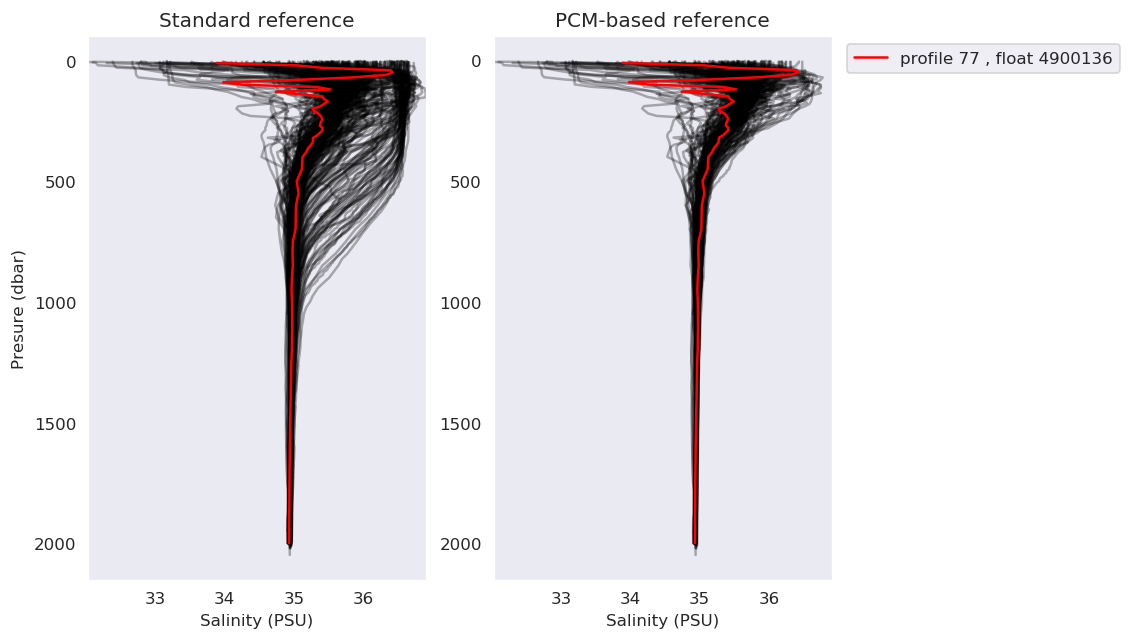

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(
            8, 6), dpi=120, facecolor='w', edgecolor='k')

for i in range(len(ds_ref['n_profiles'])):
    ax[0].plot(ds_ref['sal'].isel(n_profiles = i), ds_ref['pres'].isel(n_profiles = i), 'k', alpha=0.3);
ax[0].plot(ds_f['PSAL'].values[0], ds_f['PRES'].values[0], 'r', label='profile ' + str(prof_num)+ ' , float ' + str(float_WMO));
ax[0].invert_yaxis()
ax[0].set_ylabel('Presure (dbar)', fontsize=10);
ax[0].set_xlabel('Salinity (PSU)', fontsize=10);
ax[0].set_title('Standard reference')
ax[0].set_xlim([ds_ref['sal'].min(), ds_ref['sal'].max()])

for i in range(len(ds_ref_class['n_profiles'])):
    ax[1].plot(ds_ref_class['sal'].isel(n_profiles = i), ds_ref_class['pres'].isel(n_profiles = i), 'k', alpha=0.3);
ax[1].plot(ds_f['PSAL'].values[0], ds_f['PRES'].values[0], 'r', label='profile ' + str(prof_num)+ ' , float ' + str(float_WMO));
ax[1].invert_yaxis()
ax[1].set_xlabel('Salinity (PSU)', fontsize=10);
ax[1].set_title('PCM-based reference')
ax[1].set_xlim([ds_ref['sal'].min(), ds_ref['sal'].max()])
ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left')

__Spatial distribution of reference profiles__

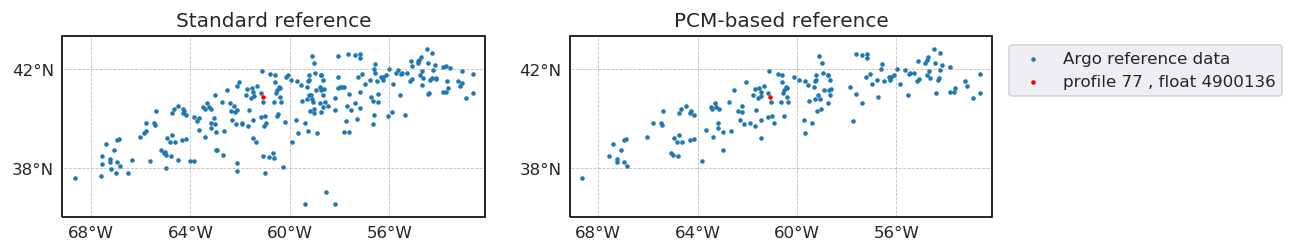

In [10]:
proj=ccrs.PlateCarree()
subplot_kw = {'projection': proj}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(
            10, 6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

# without class selection
p1 = ax[0].scatter(ds_ref['long'], ds_ref['lat'], s=3, transform=proj, label='Argo reference data')
p2 = ax[0].scatter(ds_f['LONGITUDE'], ds_f['LATITUDE'], s=3, color = 'r', transform=proj, label='profile ' + str(prof_num)+ ' , float ' + str(float_WMO))

land_feature = cfeature.NaturalEarthFeature(
            category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
ax[0].add_feature(land_feature, edgecolor='black')

defaults = {'linewidth': .5, 'color': 'gray', 'alpha': 0.5, 'linestyle': '--'}
gl = ax[0].gridlines(crs=ax[0].projection,draw_labels=True, **defaults)
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180+1, 4))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90+1, 4))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'fontsize': 10}
gl.ylabel_style = {'fontsize': 10}
gl.xlabels_top = False
gl.ylabels_right = False
ax[0].set_title('Standard reference')
long_180 = np.mod(ds_ref['long']+180,360)-180
ax[0].set_xlim([long_180.min()-0.5, long_180.max()+0.5])
ax[0].set_ylim([ds_ref['lat'].min()-0.5, ds_ref['lat'].max()+0.5])

# with class selection k=5
p1 = ax[1].scatter(ds_ref_class['long'], ds_ref_class['lat'], s=3, transform=proj, label='Argo reference data')
p2 = ax[1].scatter(ds_f['LONGITUDE'], ds_f['LATITUDE'], s=3, color = 'r', transform=proj, label='profile ' + str(prof_num)+ ' , float ' + str(float_WMO))

land_feature = cfeature.NaturalEarthFeature(
            category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
ax[1].add_feature(land_feature, edgecolor='black')

defaults = {'linewidth': .5, 'color': 'gray', 'alpha': 0.5, 'linestyle': '--'}
gl = ax[1].gridlines(crs=ax[1].projection,draw_labels=True, **defaults)
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180+1, 4))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90+1, 4))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'fontsize': 10}
gl.ylabel_style = {'fontsize': 10}
gl.xlabels_top = False
gl.ylabels_right = False
ax[1].set_title('PCM-based reference')
ax[1].set_xlim([long_180.min()-0.5, long_180.max()+0.5])
ax[1].set_ylim([ds_ref['lat'].min()-0.5, ds_ref['lat'].max()+0.5])

ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left')

__Number of reference profiles per profile__

In [11]:
# load standard reference data
file_path1 = 'mat_files/' + str(float_WMO) + '/nprof_files/' + str(float_WMO) + '_nprof_' + ref_type + '_noclass_FINAL.mat'
mat_dict = sp.io.loadmat(file_path1)
# load standard PCM based
file_path2 = 'mat_files/' + str(float_WMO) + '/nprof_files/' + str(float_WMO) + '_nprof_' + ref_type + '_class_FINAL.mat'
mat_dict_class = sp.io.loadmat(file_path2)

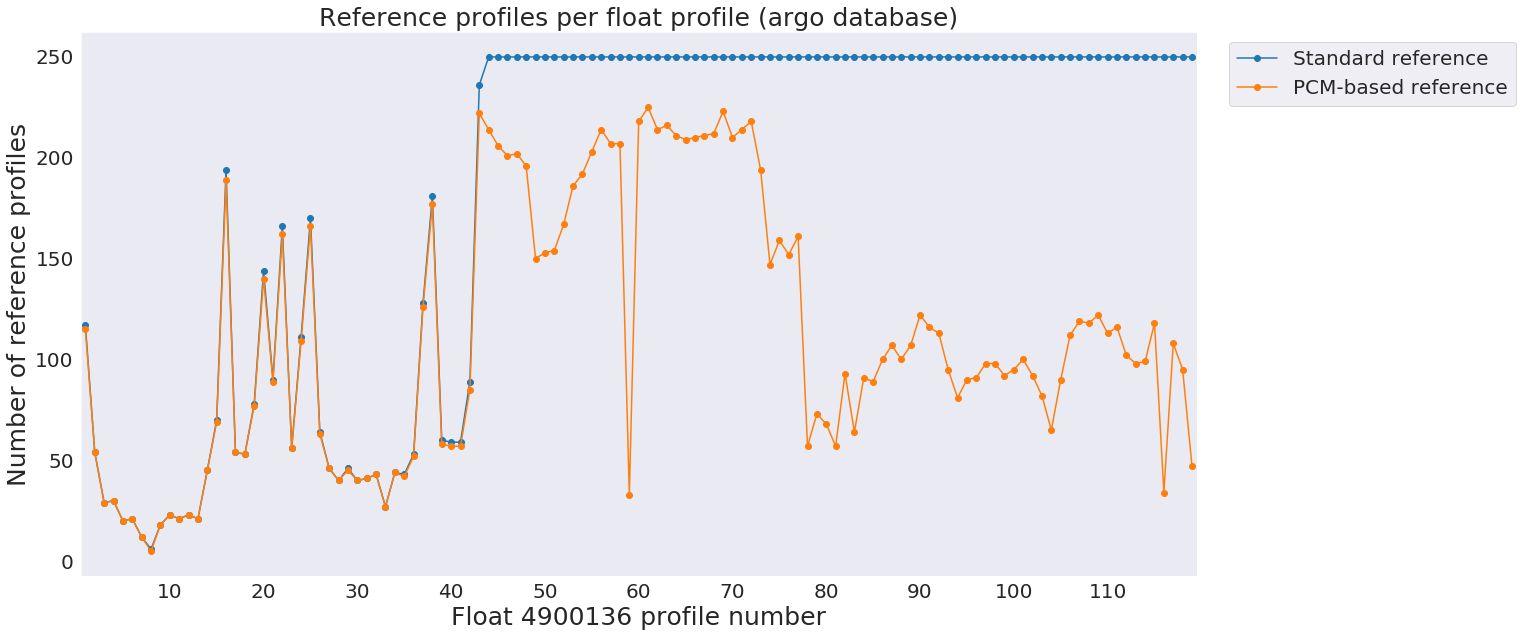

In [12]:
labels = np.arange(0,len(mat_dict['n_ref_prof'][0])+1,10)

x = np.arange(1,len(mat_dict['n_ref_prof'][0])+1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.plot(x, mat_dict['n_ref_prof'][0], 'o-', label='Standard reference')
rects2 = ax.plot(x, mat_dict_class['n_ref_prof'][0], 'o-', label='PCM-based reference')

ax.set_ylabel('Number of reference profiles', fontsize=25)
ax.set_xlabel('Float ' + str(float_WMO) + ' profile number', fontsize=25)
ax.set_title('Reference profiles per float profile (argo database)', fontsize=25)
ax.set_xticks(labels)
ax.set_xlim([0.5,len(mat_dict['n_ref_prof'][0])+0.5])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=20)
ax.tick_params(axis='both', labelsize=20)